In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import plotly.express as px


import csv
import logging
from itertools import chain
logging.basicConfig(level=logging.INFO)

In [2]:
# change directory to model location
os.chdir("..") 
from susquehanna_model import susquehanna_model

In [3]:
# load variables
varlist = []
variables = []
for filename in os.listdir('output'):
    if filename.endswith('variables.csv'):
        varlist.append(filename[:-4])
        df_temp = pd.read_csv(f"output/{filename}", header=None)
        variables.append(df_temp.values.tolist())
print(f"Loaded: {', '.join(varlist)}")
variables = list(chain.from_iterable(variables))

Loaded: SquaredExponential_10_variables


In [4]:
# Run model with found solution variables

# def model(RBFType, variables):
RBFType = "se" # RBF
numberOfInput = 3 # (time, storage of Conowingo)
numberOfOutput = 4  # Atomic, Baltimore,Chester, Downstream:- hydropower, environmental
numberOfRBF = 5  # numberOfInput + 2

# Initialize model
nobjs = 6
nvars = 40
n_years = 1
susquehanna_river = susquehanna_model(108.5, 505.0, 5, n_years)  # l0, l0_MR, d0, years
# l0 = start level cono, l0_MR = start level muddy run, d0 = startday > friday = 5
susquehanna_river.load_data(0)  # 0 = historic, 1 = stochastic
susquehanna_river.set_log(True)
susquehanna_river.setRBF(numberOfRBF, numberOfInput, numberOfOutput, RBFType)

# for solution in algorithm.result:
#     susquehanna_river.evaluate(solution.variables)
for nvars in variables:
    susquehanna_river.evaluate(nvars)
    
level_CO, level_MR, ratom, rbalt, rches, renv = susquehanna_river.get_log()
#     return level_CO, level_MR, ratom, rbalt, rches, renv

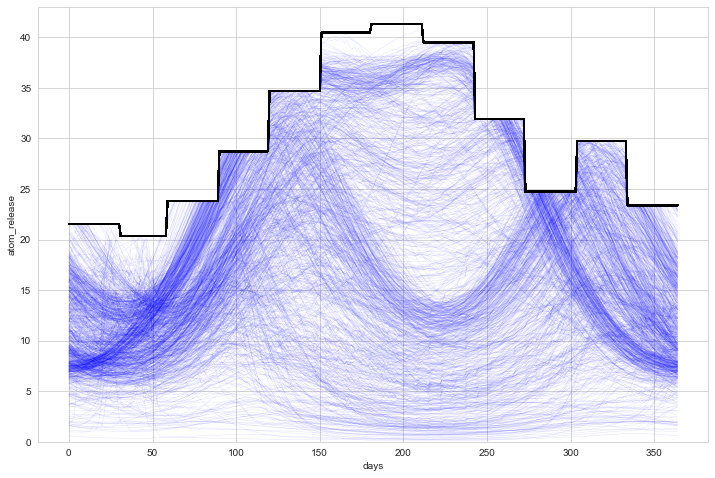

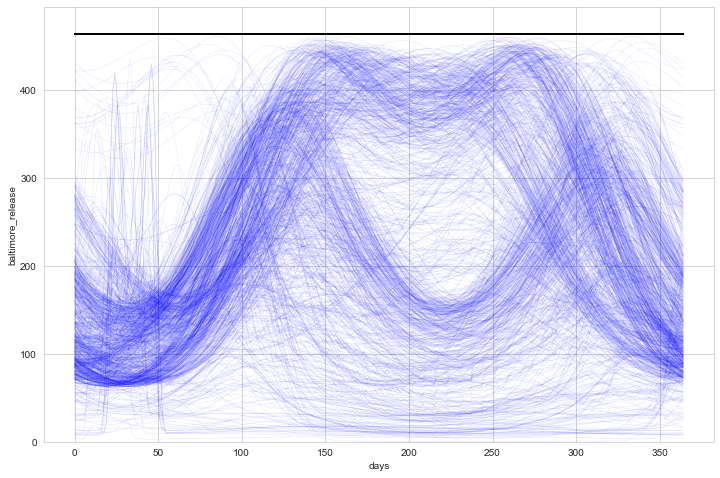

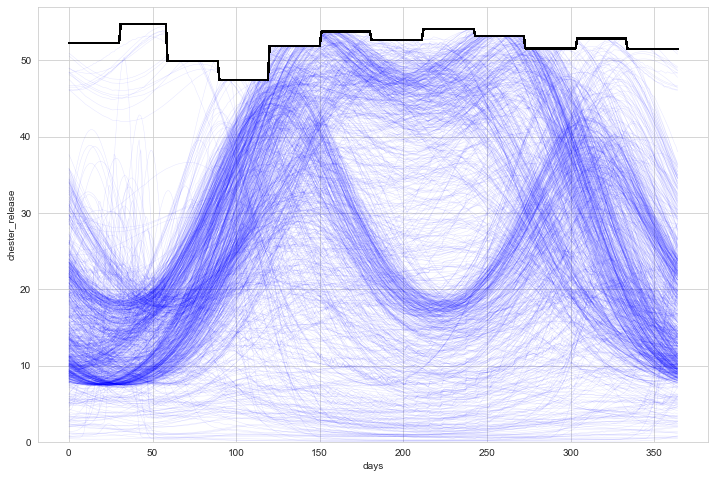

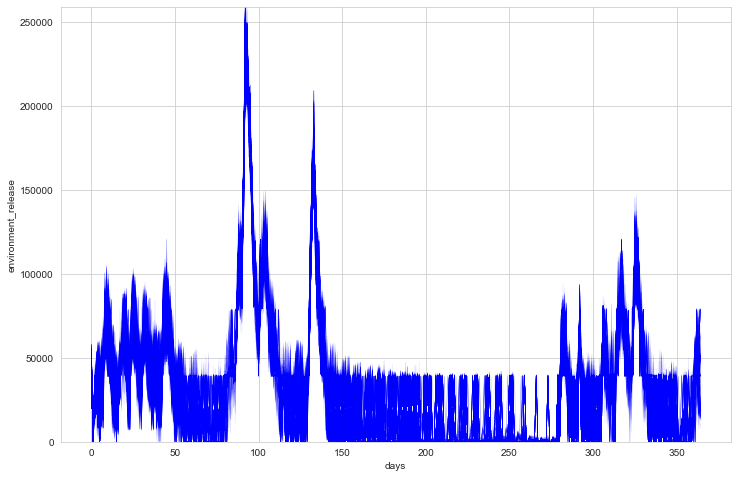

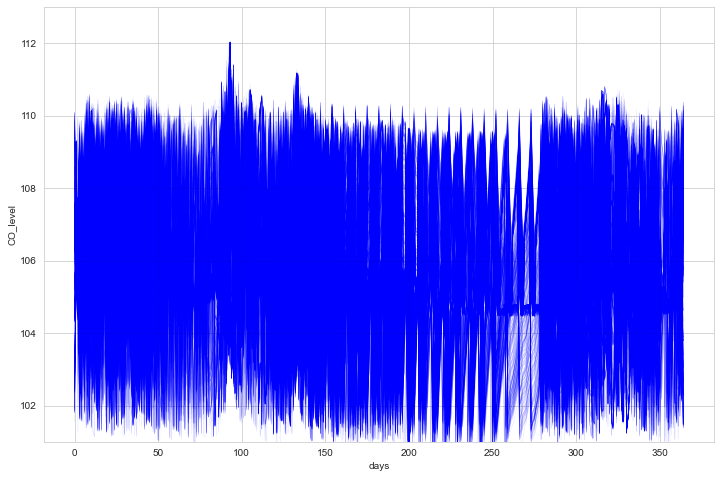

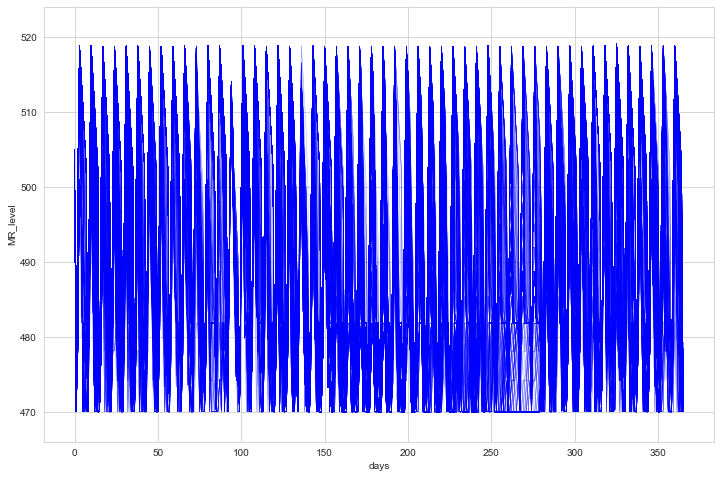

In [5]:
# load demand
for filename in os.listdir('data1999'):
    if filename.startswith('w'):
        globals()[f"{filename[:-4]}"] = np.loadtxt(f'data1999/{filename}')

# plot releases and basins
alpha = 0.1
lw = 0.5
color = "blue"
for release in ratom:
   plot = plt.plot(release, color, linewidth=lw, alpha=alpha)
   plot = plt.plot(wAtomic, "black") 
   plot = plt.xlabel('days')
   plot = plt.ylabel('atom_release')
   plot = plt.ylim((0, 43))
plt.show()

for release in rbalt:
   plot = plt.plot(release, color, linewidth=lw, alpha=alpha)
   plot = plt.plot(wBaltimore, "black")
   plot = plt.xlabel('days')
   plot = plt.ylabel('baltimore_release')
   plot = plt.ylim((0, 495))
plt.show()

for release in rches:
   plot = plt.plot(release, color, linewidth=lw, alpha=alpha)
   plot = plt.plot(wChester, "black")
   plot = plt.xlabel('days')
   plot = plt.ylabel('chester_release')
   plot = plt.ylim((0, 57))
plt.show()

for release in renv:
   plot = plt.plot(release, color, linewidth=lw, alpha=alpha)
   plot = plt.xlabel('days')
   plot = plt.ylabel('environment_release')
   plot = plt.ylim((0, 259000))
plt.show()

for year in level_CO:
   plot = plt.plot(year, color, linewidth=lw, alpha=alpha)
   plot = plt.xlabel('days')
   plot = plt.ylabel('CO_level')
   plot = plt.ylim((101, 113))
plt.show()

for year in level_MR:
   plot = plt.plot(year, color, linewidth=lw, alpha=alpha)
   plot = plt.xlabel('days')
   plot = plt.ylabel('MR_level')
   plot = plt.ylim((466, 524))
plt.show()

In [ ]:
# load objectives
objlist = []
objectives = []
for filename in os.listdir('output'):
    if filename.endswith('solution.csv'):
        objlist.append(filename[:-4])
        df_temp = pd.read_csv(f"output/{filename}", header=0)
        objectives.append(df_temp.values.tolist())
print(f"Loaded: {', '.join(objlist)}")
objectives = list(chain.from_iterable(objectives))

In [ ]:
# parcoords plot objectives
dfl = []
for i in objectives:
    dfl.append(tuple(i))
df = pd.DataFrame(dfl, columns=['Hydropower', 'AtomicPowerplant', 'Baltimore', 'Chester', 'Environment', 'Recreation'])
df = df * -1
colors = []
for i in range(len(df)):
    colors.append(i)
fig = px.parallel_coordinates(df, color="Hydropower")
fig.show()

In [32]:
x_1 = np.sin(2 * np.pi * np.linspace(0, 1, 100))
x_2 = np.cos(2 * np.pi * np.linspace(0, 1, 100))
x_3 = x_1 + x_2

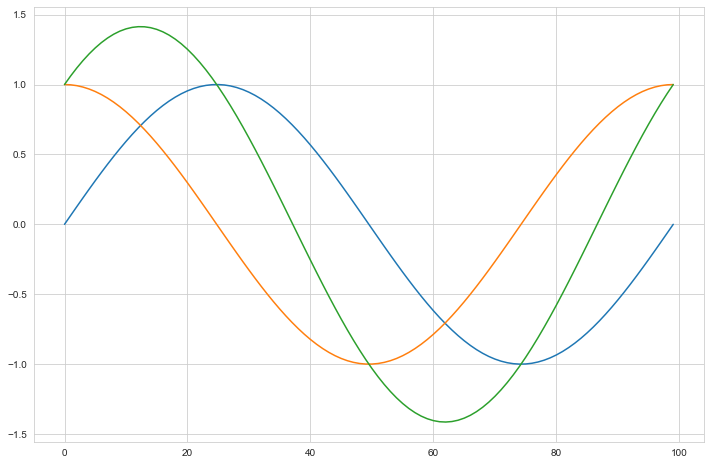

In [33]:
fig, ax = plt.subplots()
ax.plot(x_1)
ax.plot(x_2)
ax.plot(x_3)
plt.show()

In [22]:
np.linspace(0, 1, 100)

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747